In [10]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
from apra_pop_models.math_module import xp
import apra_pop_models.props as props
from apra_pop_models.imshows import *


wavelength_c = 500e-9*u.m
pupil_diam = 10*u.mm
distance = 1000*u.mm


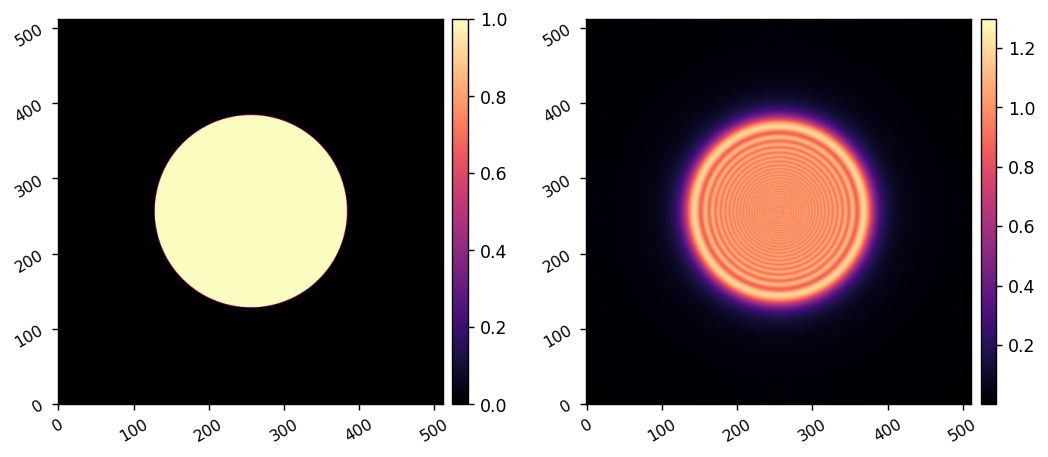

In [11]:
npix = 256
wf = poppy.FresnelWavefront(beam_radius=pupil_diam/2, npix=npix, oversample=2)
ap = poppy.CircularAperture(radius=pupil_diam/2).get_transmission(wf)

pixelscale = pupil_diam/(npix*u.pix)

prop_wf = props.ang_spec(ap, wavelength_c, distance, pixelscale)

imshow2(ap, xp.abs(prop_wf))

In [12]:
test_wf = np.loadtxt('/home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_ap_result.csv', delimiter=',')


FileNotFoundError: /home/apra/Projects/P5040/P5040_test_software/test/optical_model/test_ap_result.csv not found.